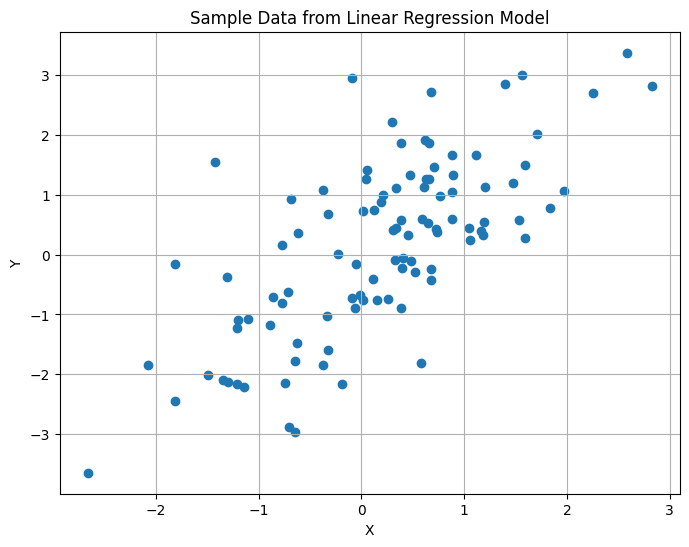

In [1]:
# task 1
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 100  # sample size
beta = 1  # coefficient for the linear model

# Generating data
X = np.random.normal(0, 1, n)  # X ~ N(0, 1)
epsilon = np.random.normal(0, 1, n)  # epsilon ~ N(0, 1)

# Linear regression model: y = beta * X + epsilon
y = beta * X + epsilon

# Plotting the data pairs
plt.figure(figsize=(8, 6))
plt.scatter(X, y)
plt.title("Sample Data from Linear Regression Model")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()


In [2]:
# task 2
# Calculation of the estimated coefficient beta_hat using least squares

# Adding a column of ones to X for the intercept term
X_matrix = np.vstack([X, np.ones(len(X))]).T

# Calculating beta_hat using the formula beta_hat = (X^T X)^(-1) X^T Y
beta_hat = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ y

beta_hat_estimate = beta_hat[0]  # Extracting the slope coefficient

beta_hat_estimate



1.0282080742394974

In [3]:
# task 3
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generating new data with larger noise (sigma^2_epsilon = 5)
noise_variance = 5
epsilon_new = np.random.normal(0, np.sqrt(noise_variance), n)
y_new = beta * X + epsilon_new

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_matrix, y_new, test_size=0.3, random_state=42)

# Ridge Regression with different values of lambda (regularization parameter)
lambdas = np.linspace(0.01, 10, 100)
errors = []

for lam in lambdas:
    # Ridge Regression formula
    beta_ridge = np.linalg.inv(X_train.T @ X_train + lam * np.identity(X_train.shape[1])) @ X_train.T @ y_train
    y_pred = X_test @ beta_ridge
    error = mean_squared_error(y_test, y_pred)
    errors.append(error)

# Finding the optimal lambda
optimal_lambda_index = np.argmin(errors)
optimal_lambda = lambdas[optimal_lambda_index]
optimal_error = errors[optimal_lambda_index]

optimal_lambda, optimal_error



(0.01, 4.810857287358994)

In [4]:
# task 4
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generating data
y_sine = np.sin(X) + np.random.normal(0, 1, n)  # Y = sin(X) + epsilon

# Splitting the data into training and test sets
X_train_sine, X_test_sine, y_train_sine, y_test_sine = train_test_split(X.reshape(-1, 1), y_sine, test_size=0.3, random_state=42)

# Polynomial Regression for various degrees M
max_degree = 10
mse_errors = []

for M in range(1, max_degree + 1):
    # Creating polynomial features
    poly = PolynomialFeatures(degree=M)
    X_train_poly = poly.fit_transform(X_train_sine)
    X_test_poly = poly.transform(X_test_sine)

    # Fitting the model
    model = LinearRegression()
    model.fit(X_train_poly, y_train_sine)

    # Predicting and calculating MSE
    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test_sine, y_pred)
    mse_errors.append(mse)

# Finding the optimal polynomial degree M
optimal_M_index = np.argmin(mse_errors)
optimal_M = optimal_M_index + 1  # Adding 1 because degrees start from 1
optimal_M, mse_errors[optimal_M_index]



(3, 1.1917094362886365)